# Métricas de releases do repositório salic minc

In [1]:
import os

github_token = "your_github_token"

In [2]:
import requests

headers = {"Authorization": f"token: {github_token}"}

salic_releases = requests.get("https://api.github.com/repos/culturagovbr/salic-minc/releases?page=1&per_page=100",
                              headers=headers).links

In [3]:
import re

last_page_url = salic_releases["last"]["url"]
page_number_regex = re.search(r'page=\d\&', last_page_url)
last_page_number = int(page_number_regex.group(0)[-2])

## Coletando todas as releases

In [4]:
from datetime import datetime


all_releases = {"releases": []}
for page_number in range(1, last_page_number + 1):
    releases_json = requests.get(f"https://api.github.com/repos/culturagovbr/salic-minc/releases?page={page_number}&per_page=100",
                                 headers=headers).json()
    for i, _ in enumerate(releases_json):
        datetime_object = datetime.strptime(releases_json[i]["created_at"], '%Y-%m-%dT%H:%M:%SZ')
        releases_dict = {
            "date": releases_json[i]["created_at"],
            "month": datetime_object.month,
            "year": datetime_object.year
        }
        all_releases["releases"].append(releases_dict)

In [5]:
releases_month = []

for release in all_releases["releases"]:
    if str(release["month"]) + "/" + str(release["year"]) not in releases_month:
        releases_month.append(str(release["month"]) + "/" + str(release["year"]))

dict_months = dict.fromkeys(releases_month, 0)

for item in all_releases["releases"]:
    dict_months[str(item["month"]) + "/" + str(item["year"])] += 1


## Ordenando releases por data crescente

In [6]:
from collections import OrderedDict

dict_months = OrderedDict(dict_months) 
dreversed = OrderedDict()
for k in reversed(dict_months):
    dreversed[k] = dict_months[k]
ordered_releases = dict(dreversed)

## Plotando gráfico de releases por Mês/ano

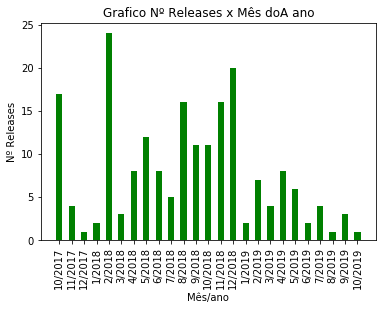

<Figure size 1728x1008 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

titulo_grafico = 'Grafico Nº Releases x Mês doA ano'
plt.xticks(rotation='vertical', fontsize=10)
plt.title(titulo_grafico)
plt.ylabel('Nº Releases')
plt.xlabel('Mês/ano')
plt.bar(ordered_releases.keys(), ordered_releases.values(), width=.5, color='g')
plt.figure(figsize=(24,14))
plt.show()